## A.I. Assignment 5

## Learning Goals

By the end of this lab, you should be able to:
* Get more familiar with tensors in pytorch 
* Create a simple multilayer perceptron model with pytorch
* Visualise the parameters


### Task

Build a fully connected feed forward network that adds two bits. Determine the a propper achitecture for this network (what database you use for this problem? how many layers? how many neurons on each layer? what is the activation function? what is the loss function? etc)

Create at least 3 such networks and compare their performance (how accurate they are?, how farst they are trained to get at 1 accuracy?)

Display for the best one the weights for each layer.


In [10]:
import torch
import torch.nn as nn
from collections import OrderedDict


In [11]:
# your code here
class BinaryAdditionNetwork(nn.Module):
    def __init__(self, input_dim):
        super(BinaryAdditionNetwork, self).__init__()
        self.hidden = nn.Linear(2, 4)
        self.output = nn.Linear(4, 1)

    def forward(self, x):
        x = torch.sigmoid(self.hidden(x))
        x = torch.sigmoid(self.output(x))
        return x

In [12]:
inputs = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]])
inputs = inputs.float()
targets = torch.tensor([0, 1, 1, 1])
targets = targets.float()
net = BinaryAdditionNetwork(input_dim=2)
print(net)


BinaryAdditionNetwork(
  (hidden): Linear(in_features=2, out_features=4, bias=True)
  (output): Linear(in_features=4, out_features=1, bias=True)
)


In [17]:
# your code here
print(inputs)

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


In [18]:
# your code here
print(targets)

tensor([0., 1., 1., 1.])


In [19]:
# your code here
import torch.optim as optim
criterion = nn.BCELoss()
optimizer = optim.SGD(net.parameters(), lr=0.1)

In [23]:
# your code here
# Train the model
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, targets.unsqueeze(1))
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'epoch number [{epoch+1}/1000], with the loss: {loss.item():.4f}')

with torch.no_grad():
    predicted = (net(inputs) > 0.5).float()
    accuracy = (predicted == targets).sum().item() / targets.size(0)


print("accuracy:", accuracy)


epoch number [100/1000], with the loss: 0.0866
epoch number [200/1000], with the loss: 0.0713
epoch number [300/1000], with the loss: 0.0599
epoch number [400/1000], with the loss: 0.0512
epoch number [500/1000], with the loss: 0.0445
epoch number [600/1000], with the loss: 0.0391
epoch number [700/1000], with the loss: 0.0347
epoch number [800/1000], with the loss: 0.0311
epoch number [900/1000], with the loss: 0.0282
epoch number [1000/1000], with the loss: 0.0257
accuracy: 2.5


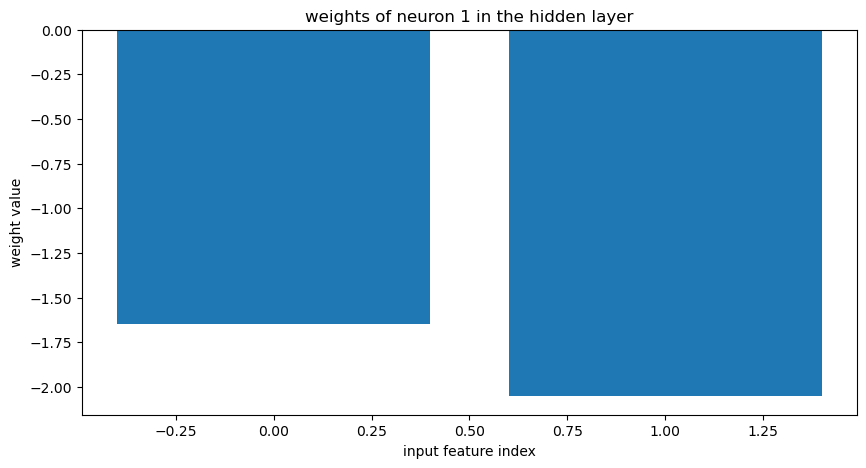

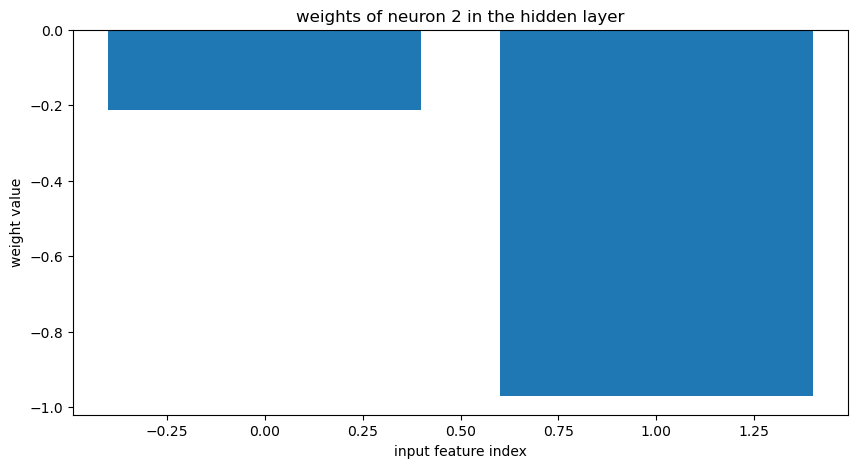

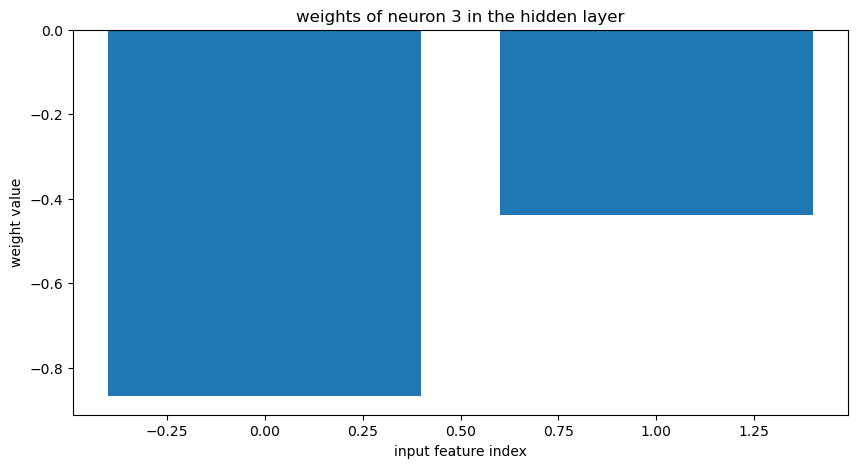

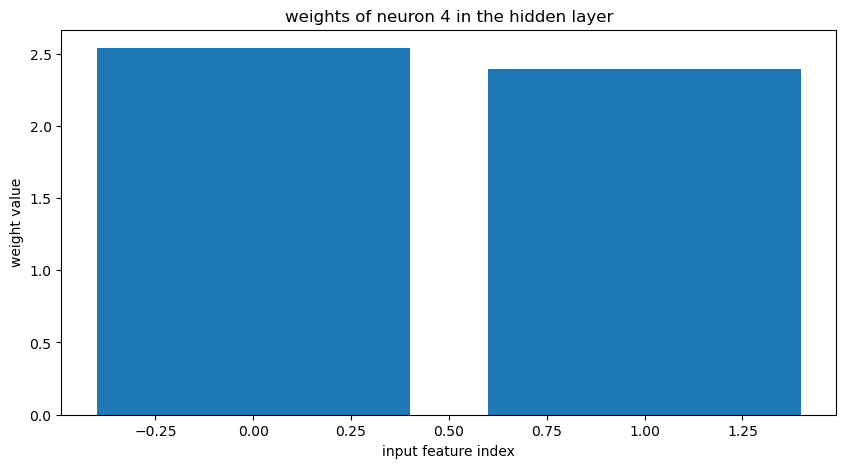

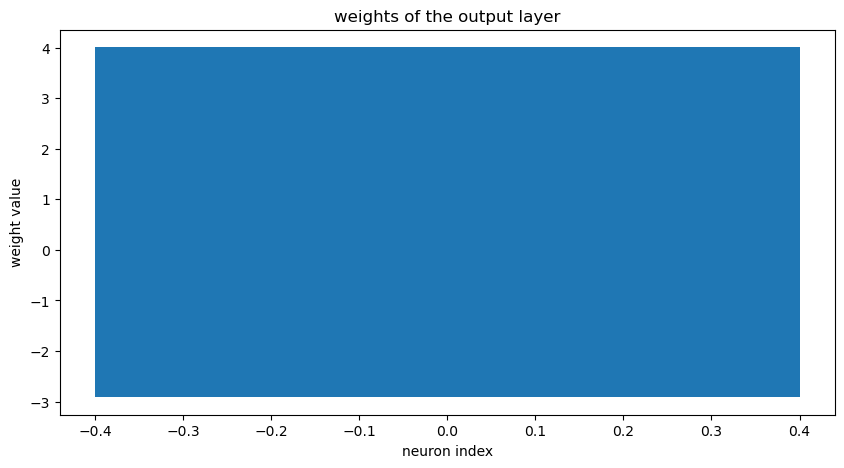

In [21]:
# your code here
# visualize the resuts
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

hidden_weights = net.hidden.weight.detach().numpy()

for i in range(hidden_weights.shape[0]):
    plt.figure(figsize=(10, 5))
    plt.bar(range(hidden_weights.shape[1]), hidden_weights[i])
    plt.title(f'weights of neuron {i+1} in the hidden layer')
    plt.xlabel('input feature index')
    plt.ylabel('weight value')
    plt.show()

output_weights = net.output.weight.detach().numpy()
plt.figure(figsize=(10, 5))
plt.bar(range(output_weights.shape[0]), output_weights.flatten())
plt.title('weights of the output layer')
plt.xlabel('neuron index')
plt.ylabel('weight value')
plt.show()


In [22]:
# your code here
# print model wights
print("weights for the hidden layer:")
print(net.hidden.weight)
print("weights for the output layer:")
print(net.output.weight)
hidden_neurons = net.hidden.weight.shape[1]
output_neurons = net.output.weight.shape[1]
print("number of neurons in the hidden layer:", hidden_neurons)
print("number of neurons in the output layer:", output_neurons)

weights for the hidden layer:
Parameter containing:
tensor([[-1.6458, -2.0527],
        [-0.2113, -0.9710],
        [-0.8683, -0.4389],
        [ 2.5382,  2.3923]], requires_grad=True)
weights for the output layer:
Parameter containing:
tensor([[-2.9144, -0.8564, -0.9912,  4.0080]], requires_grad=True)
number of neurons in the hidden layer: 2
number of neurons in the output layer: 4
